# Condiciones de la asignación principal
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.


## Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.



# Cargar los datos

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
contract=pd.read_csv('datasets/final_provider/contract.csv')
personal=pd.read_csv('datasets/final_provider/personal.csv')
internet=pd.read_csv('datasets/final_provider/internet.csv')
phone=pd.read_csv('datasets/final_provider/phone.csv')

# EDA

## Datos ausentes y tipos de datos

### contract

In [3]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
contract.sample()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
147,2135-RXIHG,2019-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,45.65,45.65


In [5]:
contract.duplicated().sum()

0

array([[<Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

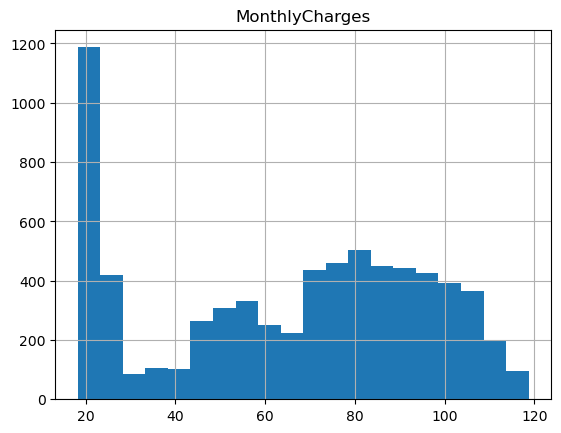

In [6]:
contract.hist(bins=20)

<Axes: >

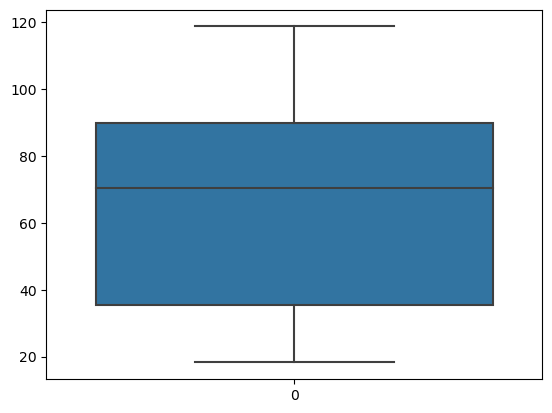

In [7]:
sns.boxplot(contract['MonthlyCharges'])

### personal

In [8]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [9]:
personal.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents
454,4785-FCIFB,Female,0,Yes,No


In [10]:
personal.duplicated().sum()

0

In [11]:
personal['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [12]:
senior_citizen_freq=personal.groupby('SeniorCitizen')['customerID'].count()
senior_citizen_freq

SeniorCitizen
0    5901
1    1142
Name: customerID, dtype: int64

<Axes: xlabel='SeniorCitizen'>

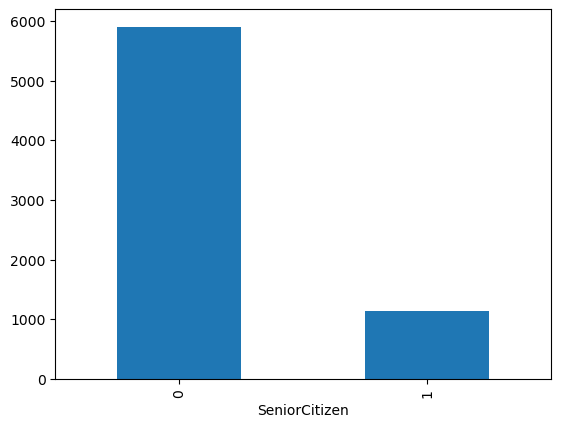

In [13]:
senior_citizen_freq.plot(kind='bar')

### internet

In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [15]:
internet.sample()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2893,6088-BXMRG,Fiber optic,No,Yes,No,No,Yes,Yes


In [16]:
internet.duplicated().sum()

0

### phone

In [17]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [18]:
phone.sample()

,customerID,MultipleLines
2285,9067-SQTNS,No


In [19]:
phone.duplicated().sum()

0

## Nombres de columnas

In [20]:
contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [21]:
contract=contract.rename(columns={'customerID':'customer_id','BeginDate':'begin_date','EndDate':'end_date','Type':'type',
                                  'PaperlessBilling':'paperless_billing','PaymentMethod':'payment_method',
                                  'MonthlyCharges':'monthly_charges','TotalCharges':'total_charges'})
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [22]:
personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [23]:
personal=personal.rename(columns={'customerID':'customer_id','SeniorCitizen':'senior_citizen','Partner':'partner','Dependents':'dependents'})
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [24]:
internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [25]:
internet=internet.rename(columns={'customerID':'customer_id','InternetService':'internet_service','OnlineSecurity':'online_security',
                                  'OnlineBackup':'online_backup','DeviceProtection':'device_protection','TechSupport':'teach_support',
                                  'StreamingTV':'streaming_tv','StreamingMovies':'streaming_movies'})
internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'teach_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [26]:
phone.columns

Index(['customerID', 'MultipleLines'], dtype='object')

In [27]:
phone=phone.rename(columns={'customerID':'customer_id','MultipleLines':'multiple_lines'})
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

## Datos ausentes
Es muy probable que algunos clientes no tienen alguno de los dos servicios: internet o teléfono. Necesito saber si alguno no tiene ninguno de estos dos servicios.

In [28]:
p_id=personal.customer_id
c_id=contract.customer_id
i_id=internet.customer_id
ph_id=phone.customer_id

In [29]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'contract'?
all([True if item in contract.customer_id.values else False for item in p_id.values])

True

In [30]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'internet'?
all([True if item in internet.customer_id.values else False for item in p_id.values])

False

In [31]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'phone'?
all([True if item in phone.customer_id.values else False for item in p_id.values])

False

In [32]:
# ¿cuantos clientes tienen ambos servicios, internet y teléfono?
internet_and_phone=personal[(personal.customer_id.isin(i_id))&(personal.customer_id.isin(ph_id))]['customer_id']
len(internet_and_phone)

4835

In [33]:
# ¿quienes son los clientes que no tienen internet?
not_internet=personal[~personal.customer_id.isin(i_id)]['customer_id']

len(not_internet)

1526

In [34]:
# ¿quienes son los clientes que no tienen teléfono?
not_phone=personal[~personal.customer_id.isin(ph_id)]['customer_id']
len(not_phone)

682

In [35]:
# ¿los clientes sin internet tampoco tienen teléfono?
any([True if item in not_internet.values else False for item in not_phone.values])

False

In [36]:
# ¿los clientes sin teléfono tampoco tienen internet?
any([True if item in not_phone.values else False for item in not_internet.values])

False

In [37]:
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [38]:
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

### Conclusion
- Los clientes son los mismos en la tabla ´personal' y 'çontract'. Esto significa que todos los clientes tienen registrado un contrato. Y tambien todos tienen alguno de los dos servicios: teléfono o internet.
- 4835 clientes tienen ambos servivios: internet y teléfono
- 1526 clientes no tienen internet
- 682 clientes no tienen teléfono.

Usaré esta información para combinar las cuatro tablas de datos.

# Preprocesamiento

A continuación, haré algunos cambios en los datos. Para no perder información, haré una copia de los datos originales.

In [39]:
# Antes de comenzar, haré una copia de las tablas originales
contract_original=contract.copy()
personal_original=personal.copy()
internet_original=internet.copy()
phone_original=phone.copy()

In [40]:
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [41]:
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [42]:
internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'teach_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [43]:
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

In [44]:
# Combino las tablas 'contract' y 'personal'
interconnect_data=contract.merge(personal, on='customer_id',how='outer')
interconnect_data=interconnect_data.merge(internet, on='customer_id',how='outer')
interconnect_data=interconnect_data.merge(phone, on='customer_id',how='outer')
interconnect_data.shape

(7043, 20)

In [45]:
interconnect_data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection',
       'teach_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

Para revisar que las tablas estan combinadas correctamente, repito la conclusión de la seccion anterior:

- Los clientes son los mismos en la tabla ´personal' y 'çontract'. Esto significa que todos los clientes tienen registrado un contrato. Y tambien todos tienen alguno de los dos servicios: teléfono o internet.
- 4835 clientes tienen ambos servivios: internet y teléfono
- 1526 clientes no tienen internet
- 682 clientes no tienen teléfono.

In [46]:
# la cantidad de datos no ausentes 
# ¿es la misma para los clientes de las columnas de la tabla 'contract' que las de la tabla 'personal'
# si es así, significa que todos los clientes tienen registrado un
interconnect_data['begin_date'].notna().count()==interconnect_data['gender'].notna().count()

True

In [47]:
both_services=interconnect_data[interconnect_data['internet_service'].notna()&
                                interconnect_data['multiple_lines'].notna()]
len(both_services)

4835

In [48]:
not_internet=interconnect_data[interconnect_data['internet_service'].isna()]
len(not_internet)

1526

In [49]:
not_phone=interconnect_data[interconnect_data['multiple_lines'].isna()]
len(not_phone)

682

Bien, la tabla se combinó correctamente. Todos los datos ausentes corresponden a clientes que no han contratado alguno de los servicios. Aun falta procesar los datos de cada columna.

## Tipos de datos

In [50]:
interconnect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  teach_support      5517 

In [51]:
interconnect_data.sample()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines
4784,1622-HSHSF,2020-01-01,No,Month-to-month,Yes,Mailed check,19.55,19.55,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [52]:
# haré una copia de esta tabla, pues le haré muchos cambios
interconnect_original=interconnect_data.copy()

## Fechas

### begin_date

In [53]:
interconnect_data['begin_date'].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [54]:
# cambio a formato fecha y me aseguro que los datos de las celdas tienen el formato correcto
interconnect_data['begin_date']=pd.to_datetime(interconnect_data['begin_date'], format='%Y-%m-%d')
type(interconnect_data['begin_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### codificación ordinal

In [55]:
# necesito saber la última fecha
max(interconnect_data['begin_date'])

Timestamp('2020-02-01 00:00:00')

In [56]:
# necesito saber la primera fecha
min(interconnect_data['begin_date'])

Timestamp('2013-10-01 00:00:00')

Bien, la última fecha es el 1 de Febrero del 2020, y la mas antigua es el 1 de Octubre del 2013.

Agregaré una columna con la fecha mas antigua para poder codificar las fechas de manera ordinal, hago esto para entrenar los modelos.

In [57]:
# crearé una columna con la fecha mas antiguas
interconnect_data['old_date_']=pd.to_datetime('2013-10-01', format='%Y-%m-%d')

In [58]:
# voy a codificar estas fechas como variables ordinales
interconnect_data['begin_date_']=interconnect_data['begin_date']-interconnect_data['old_date_']
interconnect_data['begin_date_']

0      2283 days
1      1278 days
2      2191 days
3       943 days
4      2161 days
          ...   
7038   1584 days
7039    123 days
7040   1977 days
7041   2099 days
7042    304 days
Name: begin_date_, Length: 7043, dtype: timedelta64[ns]

In [59]:
# ¿quienes fueron los primeros 5 clientes en contratar el servicio?
interconnect_data.sort_values('begin_date_').head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,old_date_,begin_date_
4513,8580-QVLOC,2013-10-01,2019-10-01 00:00:00,Two year,No,Credit card (automatic),92.45,6440.25,Female,1,...,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2013-10-01,0 days
4610,2889-FPWRM,2013-10-01,2019-10-01 00:00:00,One year,Yes,Bank transfer (automatic),117.80,8684.8,Male,0,...,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2013-10-01,0 days
3439,0917-EZOLA,2013-10-01,2019-10-01 00:00:00,Two year,Yes,Bank transfer (automatic),104.15,7689.95,Male,1,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,2013-10-01,0 days
975,2834-JRTUA,2013-11-01,2019-10-01 00:00:00,Two year,Yes,Electronic check,108.05,7532.15,Male,0,...,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes,2013-10-01,31 days
3040,7317-GGVPB,2013-11-01,2019-10-01 00:00:00,Two year,Yes,Credit card (automatic),108.60,7690.9,Male,0,...,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes,2013-10-01,31 days


Bien, la columna 'begin_date_' contiene las fechas de inscripción codificadas, listas para los modelos. Contiene los días transcurridos desde la captura de estos datos hasta la inscripcion de los clientes.

### end_date

In [60]:
interconnect_data['end_date'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [61]:
interconnect_data.groupby('end_date')['customer_id'].count()

end_date
2019-10-01 00:00:00     458
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
No                     5174
Name: customer_id, dtype: int64

Es difícil adivinar el formato de las fechas de salida de los clientes, pues podría ser:
- año, mes, día
o bien:
- año, dia, mes
Sin embargo, seria muy extraño que tantos clientes se hayan ido durante tres días seguidos: 10, 11 y 12 de Enero del 2019. Entonces, voy a suponer que el formato de fecha es el primero: año, mes, día. Así, las fechas 1 de Octubre, 1 de Noviembre, 1 de Diciembre y 1 de Enero parecen mas normales.
- otro dato: en esta columna 'end_date' la última fecha es el 1 de Enero del 2020. Mientras que en la columna 'begin_date' **la última fecha es el 1 de Febrero del 2020. Tomaré esta última como la última fecha estimada de captura todos estos datos.**

De cualquier manera, tendré que hacer algunos cambios de formato:
- 'end_date' es la columna objetivo, solo importa saber si el cliente se ha ido o no. No hay datos ausentes, si hubiera podría pensar que los datos ausentes son de clientes que siguen en la empresa o que no se han ido. Conclusión: **convertiré esta columna a datos booleanos. Si el dato es la cadena 'No', el dato será negativo (0), si es cualquier otro valor, el dato será positivo (1).**
- 'begin_date' contiene muchos datos diferentes tipo cadena. Es mas conveniente que el formato sea de fecha para poder ordenarlos, y mas adelante codificarlos como variables ordinales. **Los convertiré a fechas, revisaré la fecha mas antigua y la mas nueva, y ordenaré las fechas por días**. Hago esto para ayudar a los modelos a predecir correctamente usando estas fechas.

Por lo pronto en esta seccion procesaré la columna con fechas 'begin_data'

convertir a fechas, rango de fechas, convertir en días

## Cadenas
minusculas, unicos, faltas ortograficas, categorizar si son muchos

## Booleanos
columna objetivo, senior citizn y otros binarios

In [62]:
def Not(data):
    if data=='Not':
        bool=False
    else:
        bool=True
    return bool

In [63]:
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [64]:
contract.sample()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
6758,7956-XQWGU,2017-11-01,No,Month-to-month,Yes,Credit card (automatic),19.4,460.25


## Flotantes
El tipo esperado de datos en la columna 'total_charges' es flotante, sin embargo son cadenas de texto.

In [65]:
len(interconnect_data.total_charges.unique())

6531

Son demasiados datos diferentes para manejarlos a mano. Necesitaré un cambio de formato automático.

In [66]:
interconnect_data['total_charges']=interconnect_data['total_charges'].str.strip()

#interconnect_data['total_charges']=interconnect_data['total_charges'].str.isdigit()

#interconnect_data['total_charges']=interconnect_data['total_charges'].astype(float)

7043

In [67]:
len(interconnect_data[interconnect_data['total_charges']==''])

11

11 de loc clientes tienen una cadena vacía en su pago acumulado. Veamos porqué, examinaré los datos.

In [68]:
table1=interconnect_data[interconnect_data['total_charges']=='']
table1

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,old_date_,begin_date_
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,...,DSL,Yes,No,Yes,Yes,Yes,No,NaN,2013-10-01,2314 days
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,2013-10-01,2314 days
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2013-10-01,2314 days
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,...,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,2013-10-01,2314 days
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2013-10-01,2314 days
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,2013-10-01,2314 days


In [69]:
date=pd.to_datetime('2020-02-01', format='%Y-%m-%d')
table2=interconnect_data[interconnect_data['begin_date']==date]
table2

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,old_date_,begin_date_
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,...,DSL,Yes,No,Yes,Yes,Yes,No,NaN,2013-10-01,2314 days
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,2013-10-01,2314 days
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2013-10-01,2314 days
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,...,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,2013-10-01,2314 days
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2013-10-01,2314 days
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,2013-10-01,2314 days


In [70]:
table1==table2

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,old_date_,begin_date_
488,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
753,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
936,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1082,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
1340,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3331,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
3826,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
4380,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
5218,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
6670,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Los clientes que tienen una cadena vacía en la columna 'total_charges' es porque aun no realizan su pago porque son clientes nuevos. Entonces, su pago acumulado debería ser igual a 0. Reemplazaré las cadenas vacías por un 0.

In [77]:
table1=interconnect_data[interconnect_data['total_charges']=='']
table1

interconnect_data['total_charges']=interconnect_data['total_charges'].replace('',0)
interconnect_data[interconnect_data['total_charges']==0]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,teach_support,streaming_tv,streaming_movies,multiple_lines,old_date_,begin_date_
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,0,Female,0,...,DSL,Yes,No,Yes,Yes,Yes,No,NaN,2013-10-01,2314 days
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,0,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,0,Female,0,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,2013-10-01,2314 days
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,0,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2013-10-01,2314 days
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,0,Female,0,...,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,2013-10-01,2314 days
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,0,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,0,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2013-10-01,2314 days
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,0,Female,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,0,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2013-10-01,2314 days
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,0,Female,0,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,2013-10-01,2314 days


In [80]:
# ya puedo convertir los datos a tipo float
interconnect_data['total_charges']=interconnect_data['total_charges'].astype(float)

In [81]:
# me aseguro que los datos han sido cambiados de formato
interconnect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   customer_id        7043 non-null   object         
 1   begin_date         7043 non-null   datetime64[ns] 
 2   end_date           7043 non-null   object         
 3   type               7043 non-null   object         
 4   paperless_billing  7043 non-null   object         
 5   payment_method     7043 non-null   object         
 6   monthly_charges    7043 non-null   float64        
 7   total_charges      7043 non-null   float64        
 8   gender             7043 non-null   object         
 9   senior_citizen     7043 non-null   int64          
 10  partner            7043 non-null   object         
 11  dependents         7043 non-null   object         
 12  internet_service   5517 non-null   object         
 13  online_security    5517 non-null   object       

# Lista de preguntas aclaratorias
1 Este fue mi análisis exploratorio, busqué datos duplicados, ausentes y revisé distribuciones y tipos de datos. ¿hace falta algo mas?

2 ¿qué significa la columna 'SeniorCitizen' en la tabla de datos personales de los clientes'

3 Los datos no son imágenes, ni textos, ni series temporales. Entonces. ¿hay algun modelo en especial que debo utilizar?, ¿o yo hago mi elección?

4 ¿es nenesario utilizar SQL?. Yo me siento mas segura utilizando otros métodos como 'concat' y 'merge'

5 ¿debo utilizar git para administrar las versiones?

# Plan aproximado para resolver la tarea, que especifica de 3 a 5 pasos básicos y los explica en uno o dos enunciados

1- EDA y preprocesamiento
Haré este mismo análisis exploratorio de datos, y después un preprocesamiento de datos. Probablemente cambairé algunos datos a fecha, y otros a booleano.

2- Crearé una tabla de observaciones y características.
Cada cliente es una observación, cada columna una característica. Revisaré si algunas columas tienen influencia en el objetivo 'EndDate', si no la tienen, probablemente las eliminaré. Para buscar relaciones, utilizaré diagramas de dispersión, y probablemente vectorización de los datos.

3 Buscaré un modelo adecuado. Tomando en cuenta que es una tarea de clasificación, probaré tres o mas modelos para predecir un buen resultado AUC-ROC y exactitud, y que no tome mucho tiempo. Elegiré la codificación necesaria (dummy o por etiquetas) y ajustaré parámetros.

4 Interpretación. Elegiré los resultados del mejor modelo, y daré una descripción adecuada de sus predicciones: acerca de los clientes que se van o se quedan.